In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [14]:
df = pd.read_csv(r'/content/bestsellers with categories.csv')

In [15]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))
punctuations = string.punctuation



In [16]:
def count_punc(text):
    count = sum(1 for char in text if char in punctuations)
    return round(count / (len(text) - text.count(" ")) * 100, 3)

In [17]:
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()


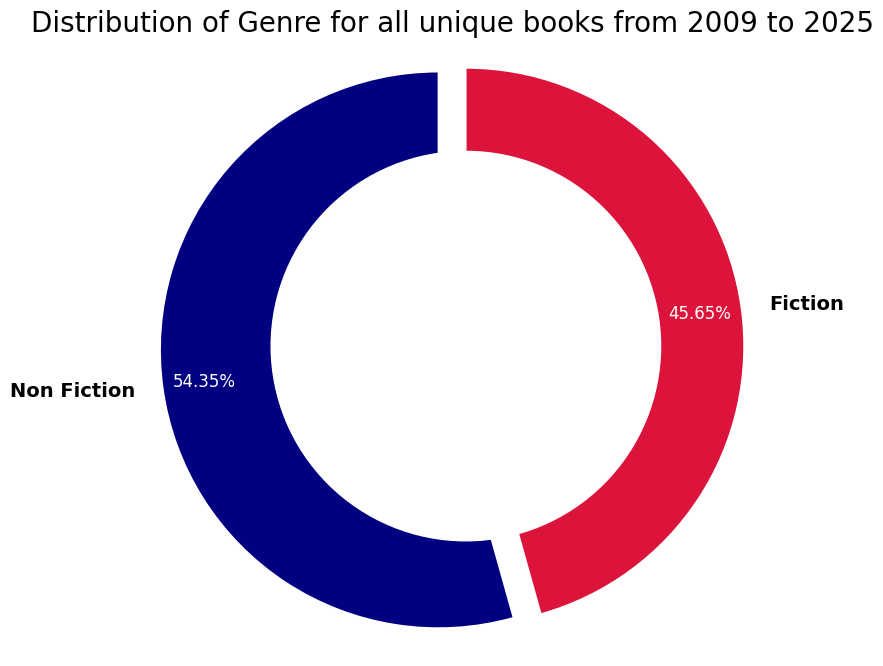

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
genre_col = ['navy', 'crimson']
explode = [0.1, 0]  # Explode the first slice

wedges, texts, autotexts = ax.pie(
    g_count.values, explode=explode, labels=g_count.index, autopct='%.2f%%',
    startangle=90, textprops={'size': 14}, colors=genre_col, pctdistance=0.85
)

# Customize appearance
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    text.set_fontweight('bold')
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Add center circle
center_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(center_circle)

ax.set_title('Distribution of Genre for all unique books from 2009 to 2025', fontsize=20)

ax.axis('equal')
plt.show()


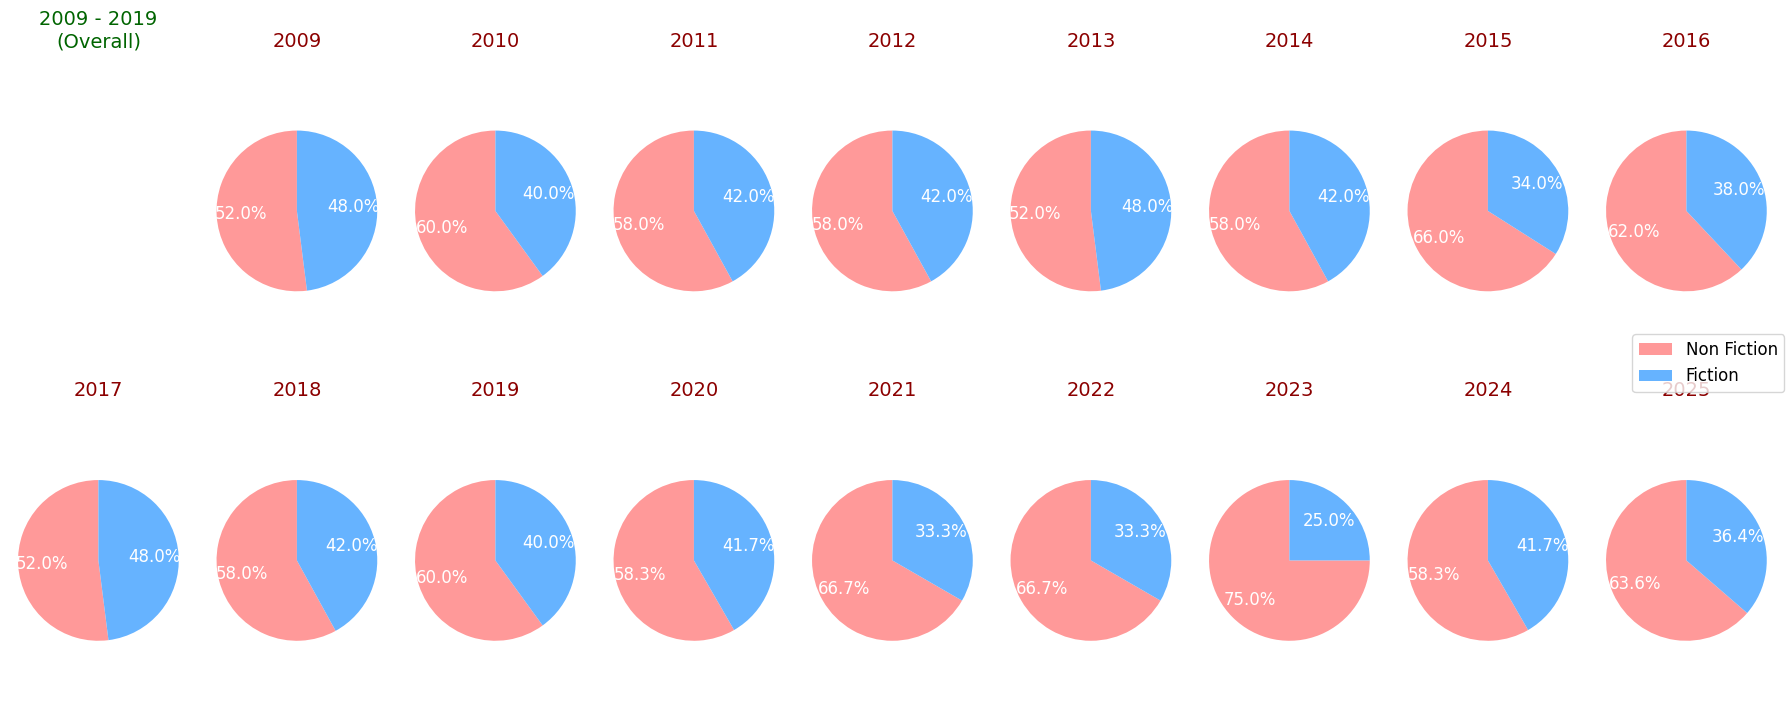

In [19]:
y1 = np.arange(2009, 2017)
y2 = np.arange(2017, 2026)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 9, figsize=(18, 8))

fig.subplots_adjust(hspace=0.4, wspace=0.3)
colors = ['#ff9999', '#66b3ff']
title_fontsize = 14

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0, i+1].pie(
        x=counts.values, labels=None, autopct='%.1f%%',
        startangle=90, textprops={'size': 12, 'color': 'white'},
        pctdistance=0.7, colors=colors, radius=1.1
    )
    ax[0, i+1].set_title(year, color='darkred', fontsize=title_fontsize)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1, i].pie(
        x=counts.values, labels=None, autopct='%.1f%%',
        startangle=90, textprops={'size': 12, 'color': 'white'},
        pctdistance=0.7, colors=colors, radius=1.1
    )
    ax[1, i].set_title(year, color='darkred', fontsize=title_fontsize)

ax[0, 0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontsize=title_fontsize)
fig.legend(g_count.index, loc='center right', fontsize=12)

# Cleanup subplot axes
for row in ax:
    for col in row:
        col.axis('equal')
        for spine in col.spines.values():
            spine.set_visible(False)
        col.set_xticks([])
        col.set_yticks([])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-20-bd7934a0d6f9>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
<ipython-input-20-bd7934a0d6f9>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')


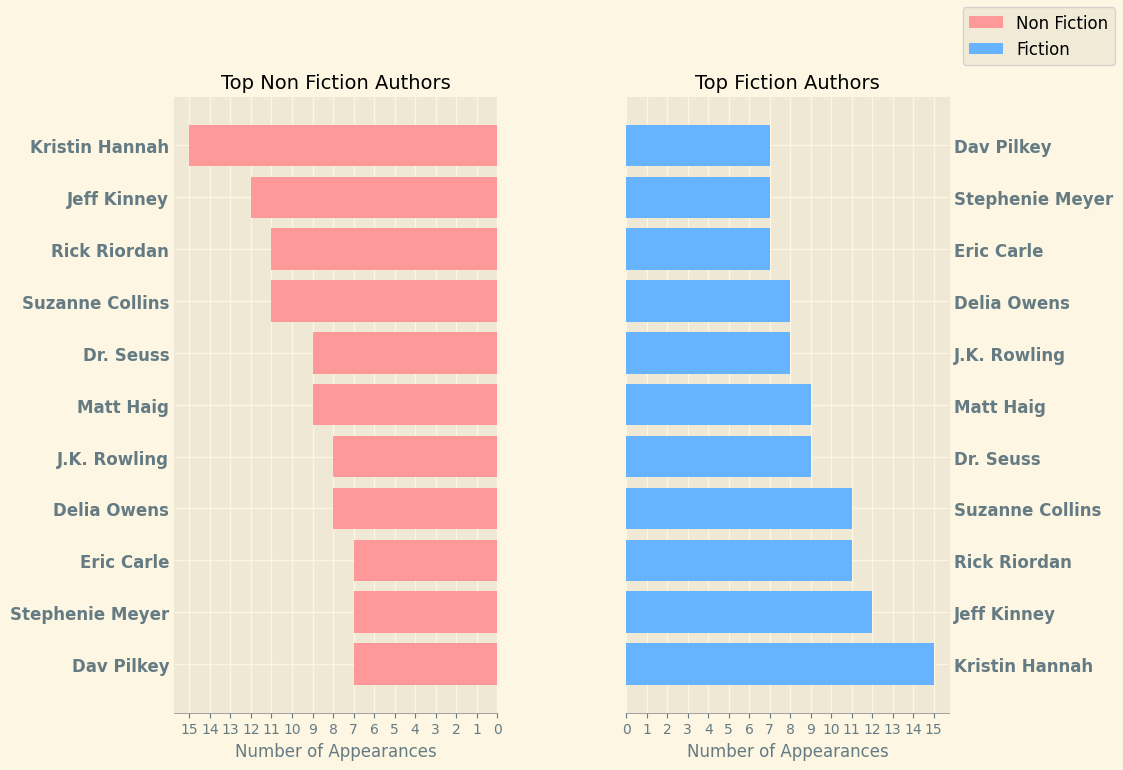

In [20]:
st_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    colors = ['#ff9999', '#66b3ff']

    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values, color=colors[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_nf_authors.values) + 1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of Appearances', fontsize=12)
    ax[0].set_title('Top Non Fiction Authors', fontsize=14)

    ax[1].barh(y=best_nf_authors.index, width=best_nf_authors.values, color=colors[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_nf_authors.values) + 1))
    ax[1].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Top Fiction Authors', fontsize=14)
    ax[1].set_xlabel('Number of Appearances', fontsize=12)

    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)

    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_linewidth(0.5)
        a.spines['bottom'].set_color('gray')
        a.tick_params(axis='y', length=0)
    ax[1].spines['left'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    ax[0].invert_yaxis()
    plt.subplots_adjust(wspace=0.4)
    plt.show()


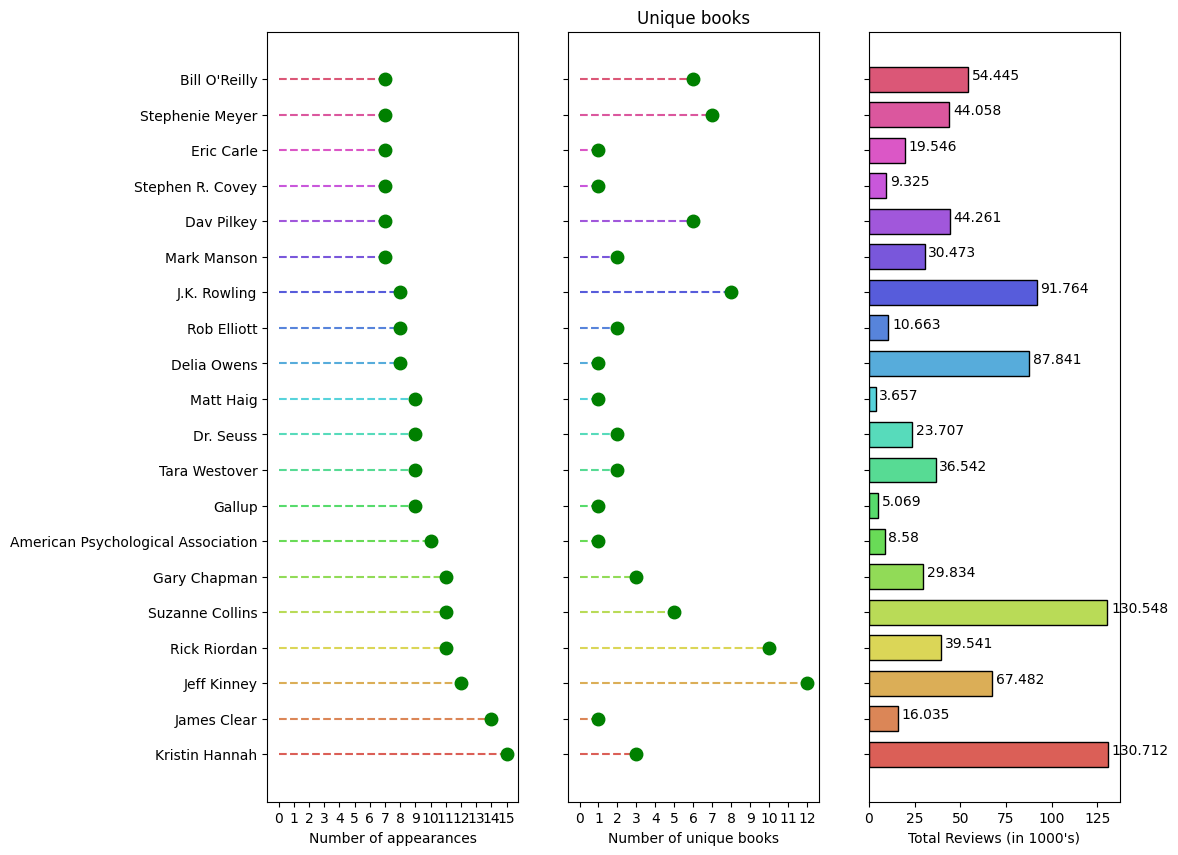

In [21]:
n_best = 20
top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name')

fig, ax = plt.subplots(1, 3, figsize=(11, 10), sharey=True)
color = sns.color_palette("hls", n_best)

# Subplot 1: Number of appearances
ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearances')
ax[0].set_xticks(np.arange(top_authors.values.max() + 1))

# Subplot 2: Number of unique books
book_count = []
total_reviews = []

for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum() / 1000)

ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count) + 1))
ax[1].set_title('Unique books')

# Subplot 3: Total Reviews
ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)

for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val + 2, name, val)

ax[2].set_xlabel("Total Reviews (in 1000's)")
plt.show()
